In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Feb 13 11:54:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!
Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np
import pickle
from os import listdir
import cv2

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.utils import class_weight

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
import os 
from random import shuffle

# Loading the Data

In [ ]:
from tqdm import tqdm
from time import sleep

In [ ]:
import numpy as np
import pandas as pd  
import os 
from sklearn.datasets import load_files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir =  '/content/drive/MyDrive/scraped_images1'
data = load_files(data_dir)

# Data Preprocessing and exploring

In [ ]:
folders=os.listdir('/content/drive/MyDrive/scraped_images1')
print(folders)

['Aloe', 'Butterfly pea', 'Cha-om', 'Chauya', 'Garlic', 'mulberry', 'Makham', 'Sweet peas', 'Shallot', 'Watermelon fruit real', 'Dok-Khae', 'Phaya-Sattabun', 'Phak-khom', 'Bottle-gourd', 'Cabbage', 'Celery', 'Gotu kola', 'Phechrsangkhat', 'Tamlung', 'Beetroot', 'Cucumber', 'Phakchi-Frang', 'Seldphangphon', 'Ginger', 'Som', 'Kha', 'Kha-na', 'Meanglak', 'Marum', 'Lemongrass', 'Pepper', 'Thabthim', 'Dok-Son', 'Cassia', 'Hya-hwan', 'Sugar-cane', 'Boraphed', 'Khamin', 'Rambutan ', 'Tey', 'Sabtiger', 'Saranae', 'Fahthalinejol', 'Chaplu', 'Horapa', 'Plu', 'Lemon', 'Krapao', 'Yanang', 'Magrud']
['Aloe', 'Butterfly pea', 'Cha-om', 'Chauya', 'Garlic', 'mulberry', 'Makham', 'Sweet peas', 'Shallot', 'Watermelon fruit real', 'Dok-Khae', 'Phaya-Sattabun', 'Phak-khom', 'Bottle-gourd', 'Cabbage', 'Celery', 'Gotu kola', 'Phechrsangkhat', 'Tamlung', 'Beetroot', 'Cucumber', 'Phakchi-Frang', 'Seldphangphon', 'Ginger', 'Som', 'Kha', 'Kha-na', 'Meanglak', 'Marum', 'Lemongrass', 'Pepper', 'Thabthim', 'Dok-So

In [ ]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/content/drive/MyDrive/scraped_images1/Phak-khom/hori_23.jpg'
 '/content/drive/MyDrive/scraped_images1/Lemongrass/deg90_31.jpg'
 '/content/drive/MyDrive/scraped_images1/Dok-Khae/b1_60.jpg' ...
 '/content/drive/MyDrive/scraped_images1/Dok-Son/deg90_41.jpg'
 '/content/drive/MyDrive/scraped_images1/Kha/c1.5_46.jpg'
 '/content/drive/MyDrive/scraped_images1/Kha-na/c1_1.jpg']
Target labels -  [31 25 12 ... 13 20 21]
Data files -  ['/content/drive/MyDrive/scraped_images1/Phak-khom/hori_23.jpg'
 '/content/drive/MyDrive/scraped_images1/Lemongrass/deg90_31.jpg'
 '/content/drive/MyDrive/scraped_images1/Dok-Khae/b1_60.jpg' ...
 '/content/drive/MyDrive/scraped_images1/Dok-Son/deg90_41.jpg'
 '/content/drive/MyDrive/scraped_images1/Kha/c1.5_46.jpg'
 '/content/drive/MyDrive/scraped_images1/Kha-na/c1_1.jpg']
Target labels -  [31 25 12 ... 13 20 21]


# Load the images

In [ ]:
import keras

In [ ]:
from tensorflow.keras.utils import load_img

In [ ]:
def convert_img_to_arr(file_path_list):
    arr = []
    img_width, img_height = 128,128
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape)
print(y.shape)

(6419, 128, 128, 3)
(6419,)


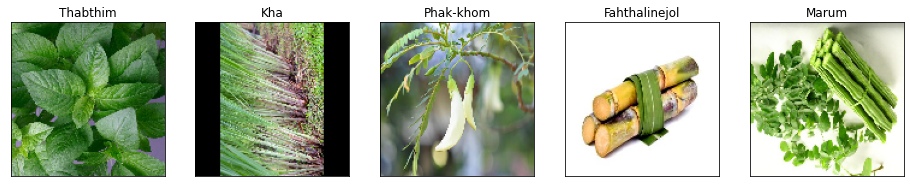

In [ ]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [ ]:
X = X.astype('float32')/255
no_of_classes = len(np.unique(y))
no_of_classes

50

In [ ]:
y

array([31, 25, 12, ..., 13, 20, 21])

# converts a class vector (integers) to binary class matrix

In [ ]:
from keras.utils import np_utils
y = np.array(np_utils.to_categorical(y,no_of_classes))
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
 #80% train, 10% validation, and 10% test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,shuffle=True)

X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)

In [ ]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (128, 128, 3)


# Model

In [ ]:
base_model =tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False,input_shape=(128,128,3))

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
base_model.trainable = False

# Add head 

In [ ]:
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=no_of_classes,activation='softmax')(average_pooling_layer)

In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

# train model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history1 = model.fit(X_train,y_train,epochs=500,validation_data=(X_valid,y_valid),batch_size=128)

Epoch 1/500
36/36 [==============================] - 6s 95ms/step - loss: 1.9475 - accuracy: 0.5424 - val_loss: 0.9386 - val_accuracy: 0.7934
Epoch 2/500
36/36 [==============================] - 2s 64ms/step - loss: 0.5423 - accuracy: 0.8990 - val_loss: 0.4684 - val_accuracy: 0.8920
Epoch 3/500
36/36 [==============================] - 2s 66ms/step - loss: 0.2537 - accuracy: 0.9555 - val_loss: 0.2712 - val_accuracy: 0.9429
Epoch 4/500
36/36 [==============================] - 2s 66ms/step - loss: 0.1360 - accuracy: 0.9820 - val_loss: 0.1878 - val_accuracy: 0.9678
Epoch 5/500
36/36 [==============================] - 2s 66ms/step - loss: 0.0808 - accuracy: 0.9942 - val_loss: 0.1426 - val_accuracy: 0.9709
Epoch 6/500
36/36 [==============================] - 2s 66ms/step - loss: 0.0497 - accuracy: 0.9964 - val_loss: 0.1260 - val_accuracy: 0.9709
Epoch 7/500
36/36 [==============================] - 2s 66ms/step - loss: 0.0329 - accuracy: 0.9989 - val_loss: 0.1138 - val_accuracy: 0.9772
Epoch 

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size= 128, verbose=2)
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

8/8 - 0s - loss: 0.0877 - accuracy: 0.9761 - 414ms/epoch - 52ms/step
Accuracy: 97.61%
Loss: 0.08772268891334534


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model_MobileNetV2_1.tflite", 'wb') as f:
  f.write(tflite_model)

# Acuuracy and Loss graphs

31/31 [==============================] - 1s 17ms/step


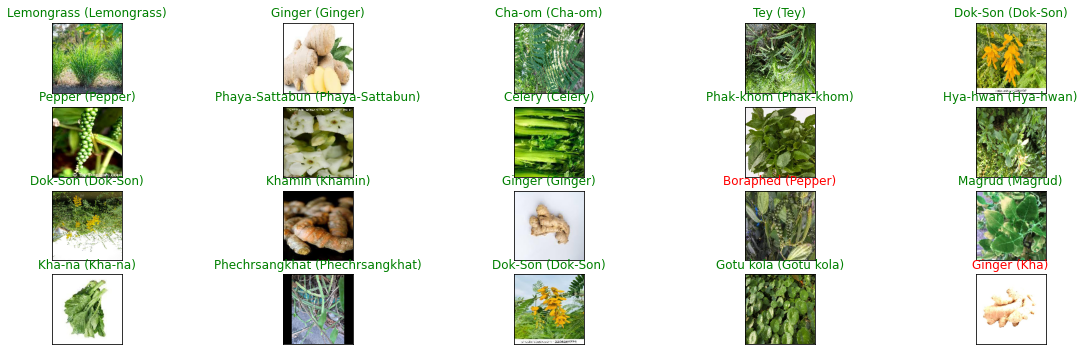

In [ ]:
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(20, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
        ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

31/31 [==============================] - 0s 14ms/step


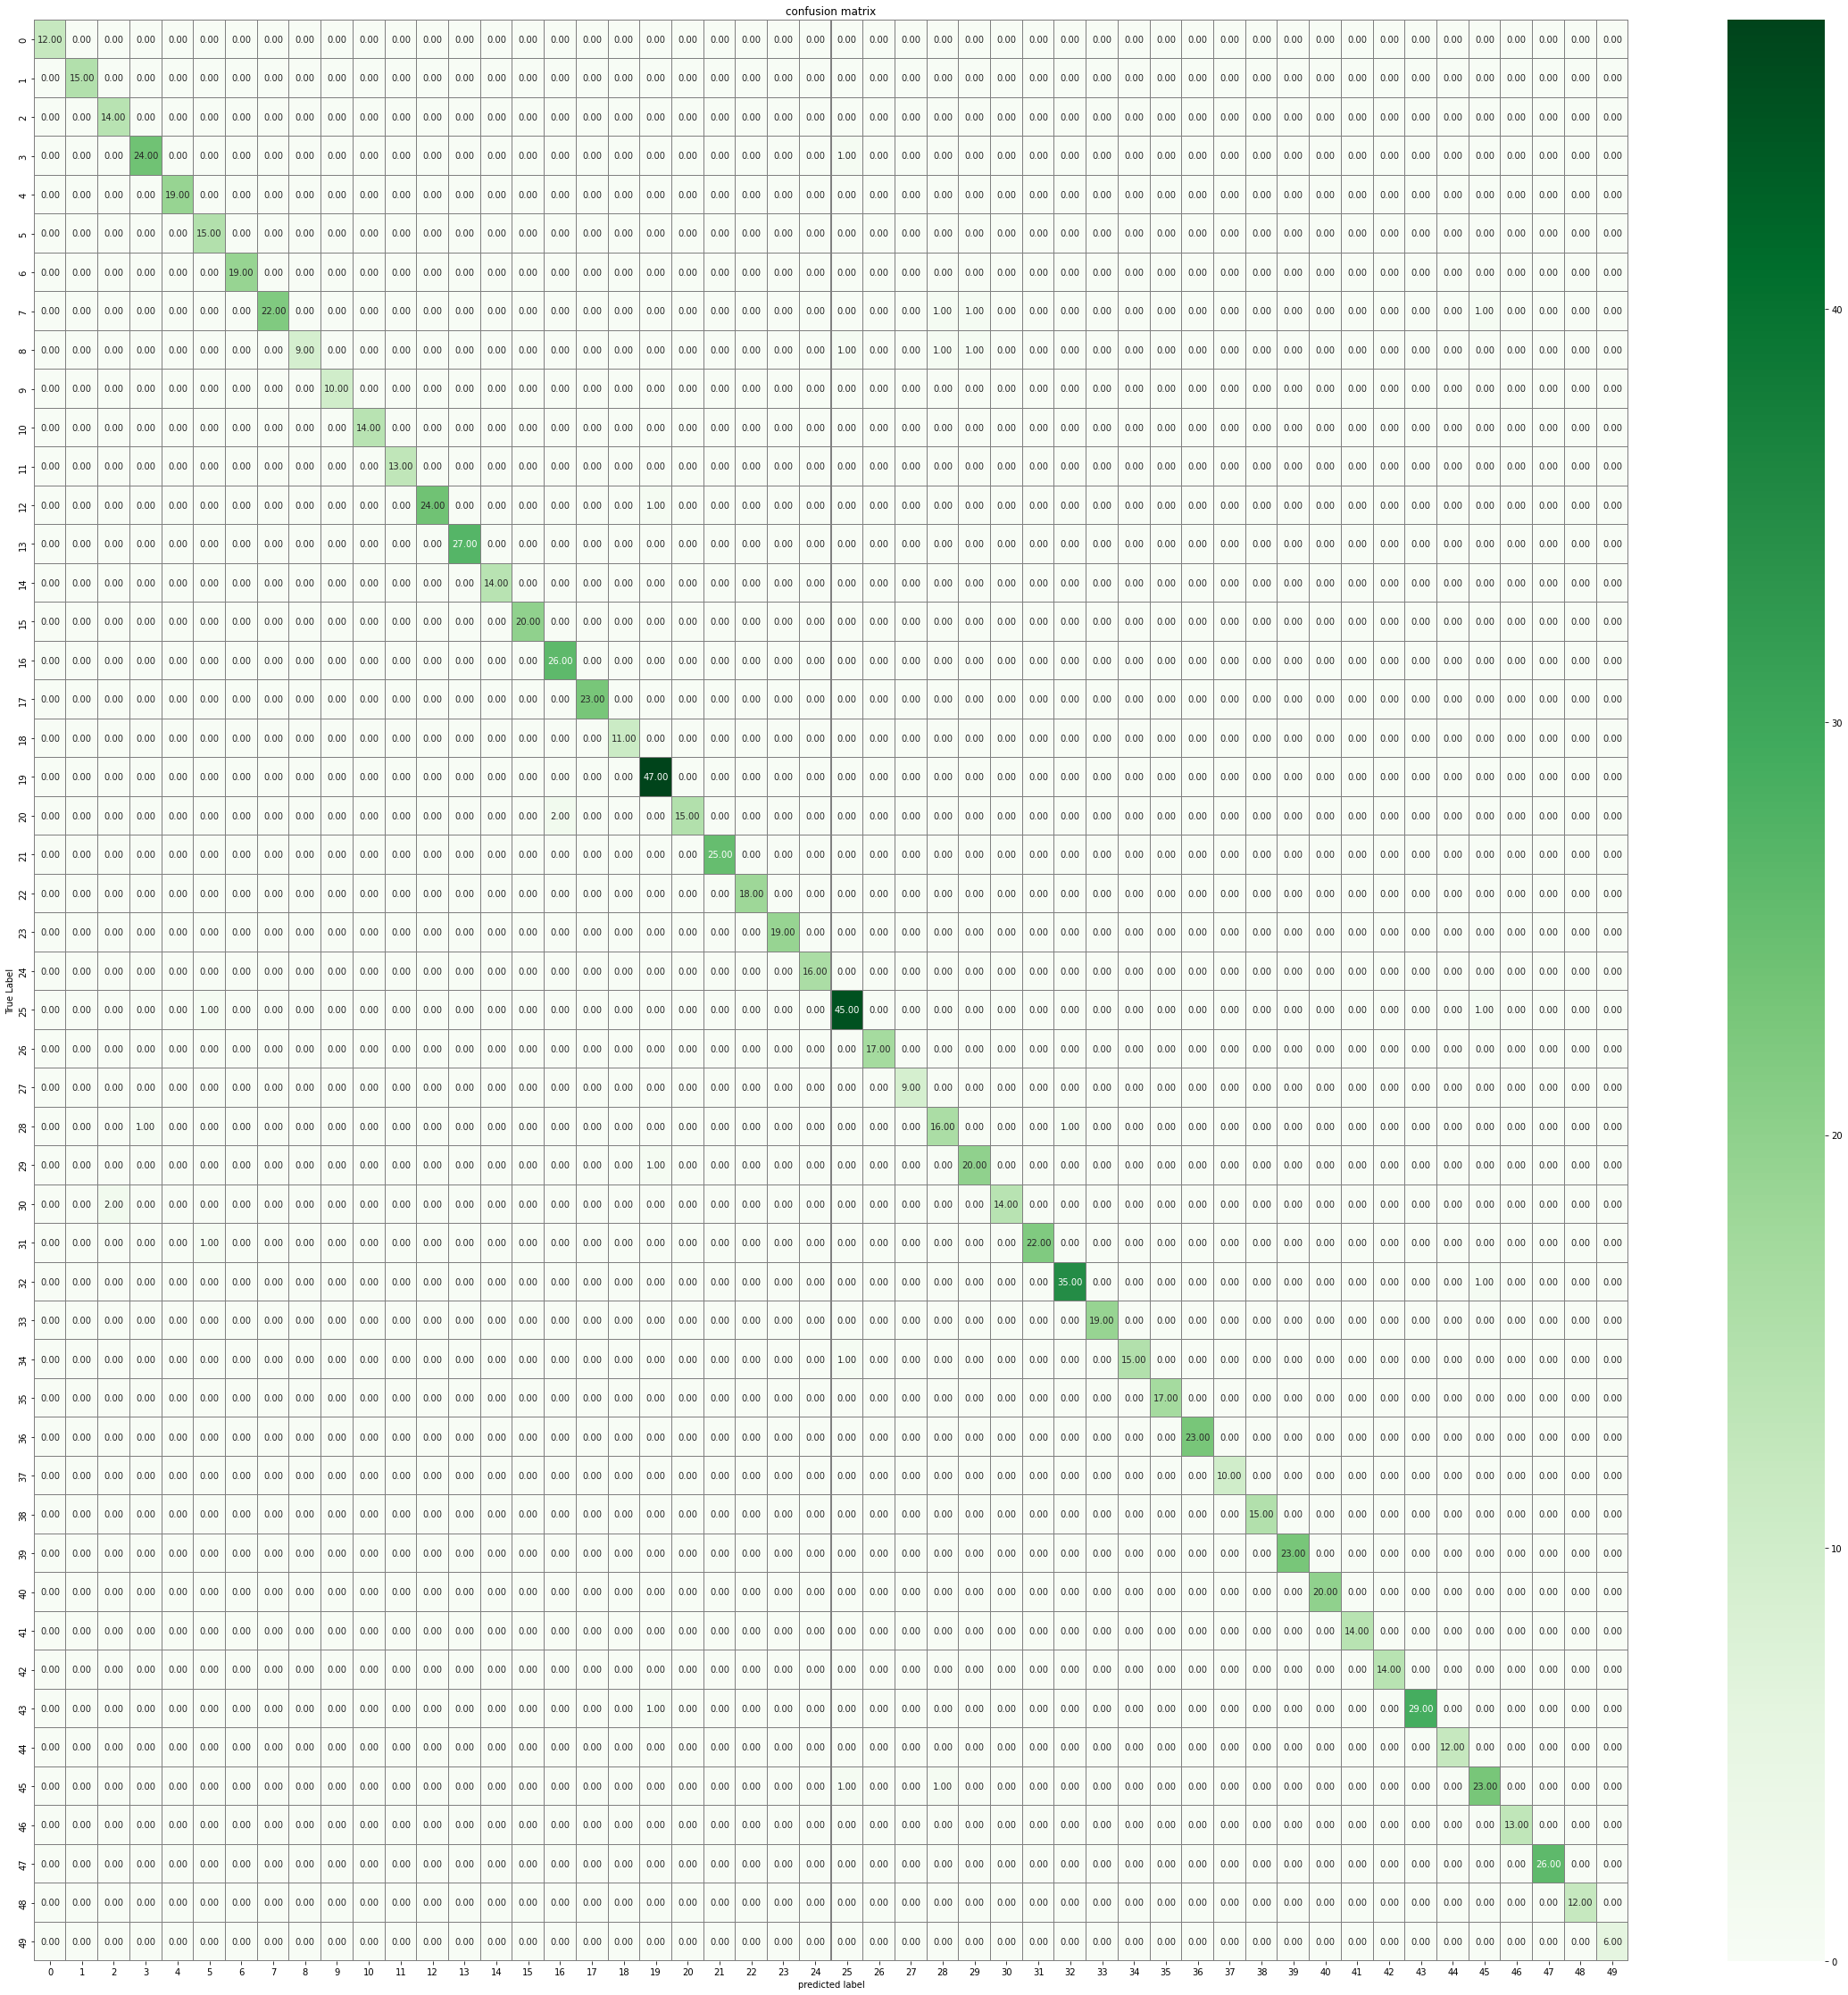

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (40,40))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
len(model.layers)

156

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
print("*******************Confusion matrix*******************")
print(confusion_matrix(Y_true,Y_pred_classes))
print("\n*******************Classification report*******************")
print(classification_report(Y_true,Y_pred_classes))

31/31 [==============================] - 1s 16ms/step
*******************Confusion matrix*******************
[[12  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0  6]]

*******************Classification report*******************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15
           2       0.88      1.00      0.93        14
           3       0.96      0.96      0.96        25
           4       1.00      1.00      1.00        19
           5       0.88      1.00      0.94        15
           6       1.00      1.00      1.00        19
           7       1.00      0.88      0.94        25
           8       1.00      0.75      0.86        12
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        14
          11       1.00  

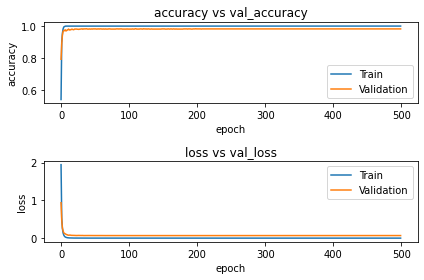

In [ ]:
import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(8)
 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  
 
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
 
plot(history1)

# Fine-tuning

In [ ]:
len(base_model.layers)

154

In [ ]:
base_model.trainable = True

In [ ]:
for layer in base_model.layers[:100]:
  layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history2 = model.fit(X_train,y_train,epochs=500,validation_data=(X_valid,y_valid),batch_size=128)

Epoch 1/500
36/36 [==============================] - 14s 143ms/step - loss: 0.5839 - accuracy: 0.8734 - val_loss: 11.4614 - val_accuracy: 0.2201
Epoch 2/500
36/36 [==============================] - 4s 106ms/step - loss: 0.1875 - accuracy: 0.9573 - val_loss: 7.8227 - val_accuracy: 0.3178
Epoch 3/500
36/36 [==============================] - 4s 107ms/step - loss: 0.1221 - accuracy: 0.9742 - val_loss: 14.0226 - val_accuracy: 0.2596
Epoch 4/500
36/36 [==============================] - 4s 107ms/step - loss: 0.1195 - accuracy: 0.9720 - val_loss: 18.7542 - val_accuracy: 0.2191
Epoch 5/500
36/36 [==============================] - 4s 108ms/step - loss: 0.1465 - accuracy: 0.9748 - val_loss: 36.9502 - val_accuracy: 0.0748
Epoch 6/500
36/36 [==============================] - 4s 107ms/step - loss: 0.0617 - accuracy: 0.9889 - val_loss: 32.6536 - val_accuracy: 0.1288
Epoch 7/500
36/36 [==============================] - 4s 107ms/step - loss: 0.0852 - accuracy: 0.9793 - val_loss: 17.5205 - val_accuracy:

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size= 128, verbose=2)
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

8/8 - 0s - loss: 0.1351 - accuracy: 0.9823 - 410ms/epoch - 51ms/step
Accuracy: 98.23%
Loss: 0.13511383533477783


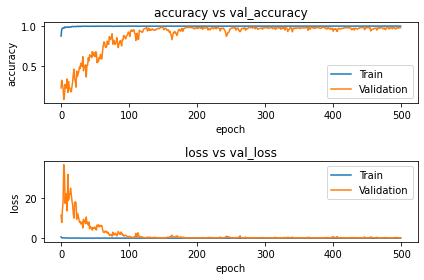

In [ ]:
import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(1)
 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  
 
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
 
plot(history2)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model_MobileNetV2_2.tflite", 'wb') as f:
  f.write(tflite_model)

31/31 [==============================] - 1s 16ms/step


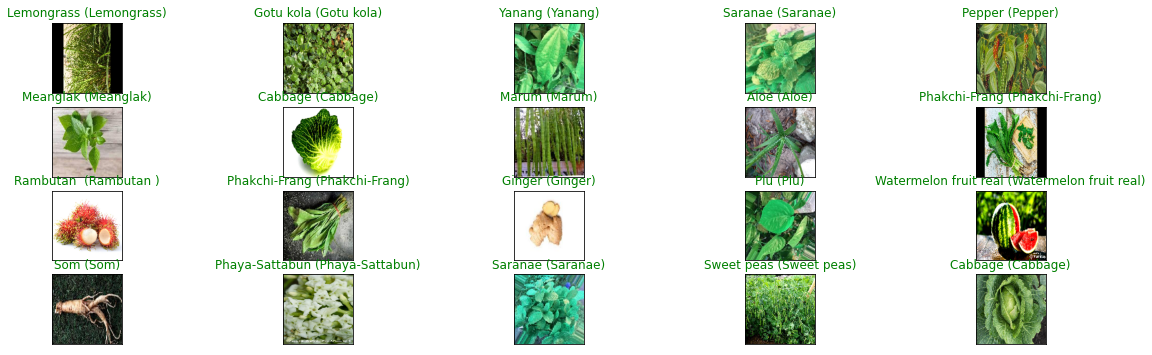

In [ ]:
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(20, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
        ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))